# ECSE 415 - Assignment 2
## Caelan Marks - 260744278

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import itertools

## 1. Dataset Overview

In [3]:
# Define unpickle function from dataset webpage
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
# Load data
batch = unpickle('data_batch_1')
data = batch[b'data']
labels = batch[b'labels']

In [6]:
# Load test data
test = unpickle('test_batch')
test_data = test[b'data']
test_labels = test[b'labels']

In [7]:
# Reformat images because they are in raw format not rgb
data_rgb = data.copy()
for i in range(len(data_rgb)):
    image = data_rgb[i]
    im_r = image[0:1024].reshape(32, 32)
    im_g = image[1024:2048].reshape(32, 32)
    im_b = image[2048:].reshape(32, 32)

    data_rgb[i] = np.dstack((im_r, im_g, im_b)).reshape(3072)

In [8]:
# Load labels
label_names = unpickle('batches.meta')
label_names = label_names[b'label_names']

In [9]:
print(data.shape)
print(len(labels))

(10000, 3072)
10000


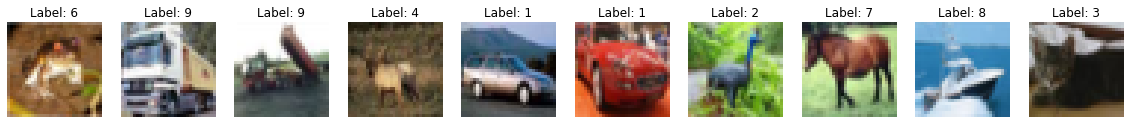

In [10]:
# Select Random batch of at least 10 images
# Display batch of images and their associated labels

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(data_rgb[i].reshape(32, 32, 3)); plt.axis('off')
    plt.title('Label: ' + str(labels[i]))
plt.show()

### Feature Extraction

In [11]:
# Mean intensity values for the 3 different colour channels (R, G, B)
mean_intensity_features = []
for i in range(len(data)):
    image = data[i]
    r_mean = np.mean(image[0:1024])
    g_mean = np.mean(image[1024:2048])
    b_mean = np.mean(image[2048:])
    mean_intensity_features.append([r_mean, g_mean, b_mean])

In [21]:
# HoG using cell size of 8x8 and block size of 2x2 and 9 orientation bins 
# Make a function that takes in a lsit of images and returns a list of HoG features
# Function used to compute the HoG features, taking a list of images as input (Adapted from Tutorial 5)
# Returns a list of the corresponding HoG features
def compute_hog_features(img_list, cell_size(8, 8), block_size=(2, 2), nbins=9):
    img_size = 3072
    
    # Computes the window size using floor division
    winSize = (img_size // cell_size[0] *  cell_size[0], img_size // cell_size[1] *  cell_size[1])
    
    # Computes the block size, in pixels
    blockSize = (block_size[0] * cell_size[0], block_size[1] * cell_size[1])
    
    # Block Stride is a multiple of the cell size
    blockStride=(cell_size[0], cell_size[1])

    # Creates the HoG objects
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cell_size, nbins)

    # Computes the number of cells fitting in the original image
    n_cells = (img_size // cell_size[0], img_size // cell_size[1])
    
    features_list = []
    for img in img_list:
        # Computes the HoG features and reshapes the resulting data for easier access, as done in Tutorial 5
        features = hog.compute(img) \
                       .reshape(n_cells[1] - block_size[1] + 1,
                                n_cells[0] - block_size[0] + 1,
                                block_size[1], block_size[0], nbins) \
                       .transpose((1, 0, 3, 2, 4))
        features_list.append(features)

    return features_list

In [ ]:
hog_features_list = compute_hog_features(data_rgb)

### Classifiers

In [12]:
# SVM
from sklearn import svm
# Random Forest
from sklearn.ensemble import RandomForestClassifier

### Evaluation Metrics

In [13]:
# Accuracy
from sklearn.metrics import accuracy_score
# Confusion Matrix
from sklearn.metrics import confusion_matrix

## 2. SVMs

### 2.1 Linear SVMs - Exploring Features

In [ ]:
# Train 2 SVMs, one on each feature ectracted
# Use gamma='scale', other hyperparameters as 'default'

In [14]:
clf_intensity = svm.SVC(gamma='scale', kernel='linear')
clf_intensity.fit(mean_intensity_features, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# Format test data to be the expected rgb mean intensities
test_mean_intensity_features = []
for i in range(len(test_data)):
    image = test_data[i]
    r_mean = np.mean(image[0:1024])
    g_mean = np.mean(image[1024:2048])
    b_mean = np.mean(image[2048:])
    test_mean_intensity_features.append([r_mean, g_mean, b_mean])

In [16]:
pred_intensity = clf_intensity.predict(test_mean_intensity_features)

In [18]:
print(accuracy_score(pred_intensity, test_labels))

0.2405


In [20]:
print(label_names[0])

b'airplane'


In [ ]:
clf_hog = svm.SVC(gamma='scale', kernel='linear')
clf_hog.fit(hog_features, labels)

In [ ]:
# Find hog features of the 
hog_features_list = compute_hog_features()

In [ ]:
pred_hog = clf_hog.predict(test_data)

In [7]:
# Which feature gives better results?

# Is it expected?

# Give a scenario where both features work well

### 2.2 Non-linear SVMs - Exploring SVM Kernels

In [8]:
# Use HoG features, train two different SVMs with different kernels, polynomial and radial basis function
# Use gamma='scale', keep other hyperparamters as default

In [ ]:
clf_poly = svm.SVC(gamma='scale', kernel='poly')
clf_rbf = svm.SVC(gamma='scale', kernel='rbf')

In [ ]:
clf_poly.fit(, labels)

In [ ]:
pred_poly = clf_poly.predict()

In [ ]:
print(accuracy_score(pred_poly, test_labels))

In [ ]:
clf_rbf.fit(, labels)

In [ ]:
pred_rbf = clf_rbf.predict()

In [ ]:
print(accuracy_score(pred_rbf, test_labels))

In [ ]:
# Compare the accuracy of the two SVMs, which one gives better results?

# Is it expected?

## 3. Random Forest Classifiers

### 3.1 RF - Exploring Performance of HoG features

In [9]:
# Use HoG features
# Train random forest using n_estimators=100, criterion='entropy', rest are default.
clf_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
# Report the performance of the classifier

In [ ]:
clf_rf.fit(, labels)

In [ ]:
pred_rf = clf_rf.predict()

In [ ]:
print(accuracy_score(pred_rf, test_labels))

### 3.2 RF - Exploring Different Number of Trees (estimators)

In [10]:
# Try with n_estimators = 40, 200, 250, write observations
clf_rf_40 = RandomForestClassifier(n_estimators=40, criterion='entropy')
clf_rf_200 = RandomForestClassifier(n_estimators=200, criterion='entropy')
clf_rf_250 = RandomForestClassifier(n_estimators=250, criterion='entropy')

In [ ]:
clf_rf_40.fit(, labels)

In [ ]:
pred_rf_40 = clf_rf_40.predict()

In [ ]:
print(accuracy_score(pred_rf_40, test_labels))

In [ ]:
clf_rf_200.fit(, labels)

In [ ]:
pred_rf_200 = clf_rf_200.predict()

In [ ]:
print(accuracy_score(pred_rf_200, test_labels))

In [ ]:
clf_rf_250.fit(, labels)

In [ ]:
pred_rf_40 = clf_rf_250.predict()

In [ ]:
print(accuracy_score(pred_rf_40, test_labels))

In [ ]:
# Do you see an increase in performance with an increase in number of trees?

# Report the number of trees that resulted in best performance

## 4. Comparison of Classifiers

### 4.1 Performance Analysis

In [11]:
# Describe the performance and the best performing RF and SVM classifier from the previous sections.

# Compare the accuracies on both train and test for each, 
# compare the confusion matricies on both train and test, write observations

# Is there any particular class which is hard to classify for SVM but easier for RF or vice versa?
print(confusion_matrix(test_labels, ))
for i in range(len(label_names)):
    print('Index: ' + str(i) + ' Label: ' + str(label_names[i]))

In [ ]:
print(confusion_matrix(test_labels, ))
for i in range(len(label_names)):
    print('Index: ' + str(i) + ' Label: ' + str(label_names[i]))

### 4.2 Exploring Different Parameters of HoG

In [12]:
# Try changing the block size, cell size, and orientation bins on either best SVM or best RF.
hog_features_list_cell = compute_hog_features(, cell_size=(16, 16))
hog_features_list_cell_test = compute_hog_features(, cell_size=(16, 16))

hog_features_list_block = compute_hog_features(, block_size=(4, 4))
hog_features_list_block_test = compute_hog_features(, block_size=(4, 4))

hog_features_list_nbins = compute_hog_features(, nbins=18)
hog_features_list_nbins_test = compute_hog_features(, nbins=18)

In [ ]:
# New cell size
clf_cell.fit(hog_features_list_cell, labels)

In [ ]:
pred_cell = clf_cell.predict(hog_features_list_cell_test)

In [ ]:
print(accuracy_score(pred_cell, test_labels))

In [ ]:
# New block size
clf_block.fit(hog_features_list_block, labels)

In [ ]:
pred_block = clf_block.predict(hog_features_list_block_test)

In [ ]:
print(accuracy_score(pred_block, test_labels))

In [ ]:
# new number of orientation bins
clf_nbins.fit(hog_features_list_nbins, labels)

In [ ]:
pred_nbins = clf_nbins.predict(hog_features_list_nbins_test)

In [ ]:
print(accuracy_score(pred_nbins, test_labels))

In [ ]:
# Report results of at least 3 experiments

### 4.3 Folded Validation

In [13]:
# Take the best performing HoG features, SVM and RF and perform 3-fold validation using any 3 data batches.
batch2 = unpickle('data_batch_2')
data2 = batch[b'data']
labels2 = batch[b'labels']
batch3 = unpickle('data_batch_3')
data3 = batch[b'data']
labels3 = batch[b'labels']

# Report the accuracies using 3-fold validation

# Do you see higher accuracy for any particular fold? If yes, what might be the reason?

### 4.4 Ensemble Classifiers

In [ ]:
# Build an ensemble method using the 6 RF and SVM classifiers (3 each) from the previous section. 
# Compare the accuracies and the confusion matrix of the ensemble with that of the best performing individual classifier.

# Which one do you expect to perform better? Why?